In [32]:
# link to the dataset https://www.nasdaq.com/market-activity/stocks/msft/historical?page=1&rows_per_page=10&timeline=y10

In [33]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Coding/Stock price prediction model/Microsoft_HistoricalData_1759950033633.csv')

In [34]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/07/2025,$523.98,14615210,$528.285,$529.80,$521.44
1,10/06/2025,$528.57,21388580,$518.61,$531.03,$518.20
2,10/03/2025,$517.35,15112320,$517.10,$520.49,$515.00
3,10/02/2025,$515.74,21222890,$517.64,$521.60,$510.6791
4,10/01/2025,$519.71,22632340,$514.80,$520.505,$511.69


In [35]:
df.shape

(2513, 6)

In [36]:
df.Date.dtype

dtype('O')

In [37]:
#to convert to date
import datetime

def str_to_datetime(date):
  split = date.split('/')
  year = int(split[2])
  month = int(split[0])
  day = int(split[1])
  return datetime.datetime(year, month, day)

In [38]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,2025-10-07
1,2025-10-06
2,2025-10-03
3,2025-10-02
4,2025-10-01
...,...
2508,2015-10-15
2509,2015-10-14
2510,2015-10-13
2511,2015-10-12


In [39]:
df.index = df.pop('Date')
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-10-07,$523.98,14615210,$528.285,$529.80,$521.44
2025-10-06,$528.57,21388580,$518.61,$531.03,$518.20
2025-10-03,$517.35,15112320,$517.10,$520.49,$515.00
2025-10-02,$515.74,21222890,$517.64,$521.60,$510.6791
2025-10-01,$519.71,22632340,$514.80,$520.505,$511.69


In [40]:
# function to remove the $ sign and convert into float
def remove_dollar(price):
  if isinstance(price, str):
    return float(price.replace('$', ''))
  return price

for col in ['Close/Last', 'Open', 'High', 'Low']:
  df[col] = df[col].apply(remove_dollar)

df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-10-07,523.98,14615210,528.285,529.800,521.4400
2025-10-06,528.57,21388580,518.610,531.030,518.2000
2025-10-03,517.35,15112320,517.100,520.490,515.0000
2025-10-02,515.74,21222890,517.640,521.600,510.6791
2025-10-01,519.71,22632340,514.800,520.505,511.6900


In [41]:
#from google.colab import sheets
#sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1VFfcMsxcfYChfR64EgWmQXpkJ6x-JOrFUmDRylM752o/edit#gid=0


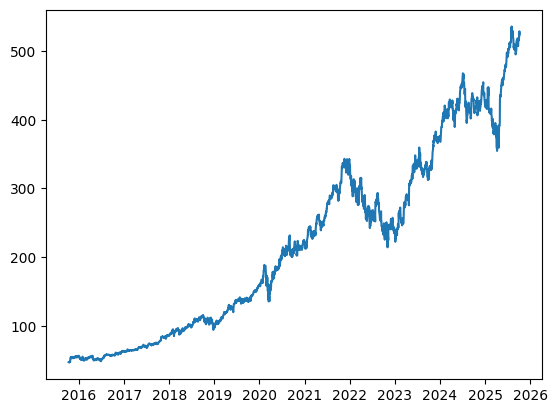

In [42]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close/Last'])
plt.show()

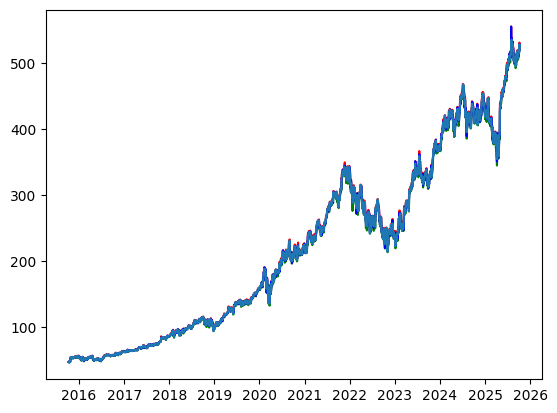

In [43]:
#on the same graph, plotting the high, low and open values with different colours
plt.plot(df.index, df['High'], color='red')
plt.plot(df.index, df['Low'], color='green')
plt.plot(df.index, df['Open'], color='blue')

plt.plot(df.index, df['Close/Last'])
plt.show()

In [44]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-10-07,523.98,14615210,528.285,529.800,521.4400
2025-10-06,528.57,21388580,518.610,531.030,518.2000
2025-10-03,517.35,15112320,517.100,520.490,515.0000
2025-10-02,515.74,21222890,517.640,521.600,510.6791
2025-10-01,519.71,22632340,514.800,520.505,511.6900


In [45]:
# df.to_csv('/content/microsoft_stock_data.csv')

In [46]:
# making the basic lstm model that can forecast the stock price using historical data and also taking the lag data
df1 = df.drop(['Volume', 'Open', 'High', 'Low'], axis=1)
df1.head(-10)

,Close/Last
Date,
2025-10-07,523.98
2025-10-06,528.57
2025-10-03,517.35
2025-10-02,515.74
2025-10-01,519.71
...,...
2015-10-29,53.36
2015-10-28,53.98
2015-10-27,53.69


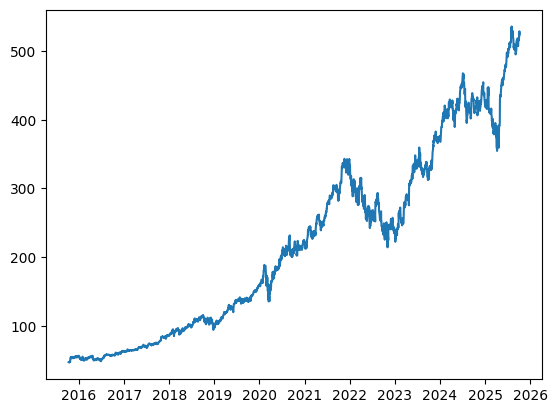

In [47]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close/Last'])

In [48]:
df2 = df1.copy()

for i in range(1, 8):
  df2['Target-' + str(i)] = df2['Close/Last'].shift(-i)

df2.head(10)



,Close/Last,Target-1,Target-2,Target-3,Target-4,Target-5,Target-6,Target-7
Date,,,,,,,,
2025-10-07,523.98,528.57,517.35,515.74,519.71,517.95,514.60,511.46
2025-10-06,528.57,517.35,515.74,519.71,517.95,514.60,511.46,507.03
2025-10-03,517.35,515.74,519.71,517.95,514.60,511.46,507.03,510.15
2025-10-02,515.74,519.71,517.95,514.60,511.46,507.03,510.15,509.23
2025-10-01,519.71,517.95,514.60,511.46,507.03,510.15,509.23,514.45
2025-09-30,517.95,514.60,511.46,507.03,510.15,509.23,514.45,517.93
2025-09-29,514.60,511.46,507.03,510.15,509.23,514.45,517.93,508.45
2025-09-26,511.46,507.03,510.15,509.23,514.45,517.93,508.45,510.02
2025-09-25,507.03,510.15,509.23,514.45,517.93,508.45,510.02,509.04


In [49]:
df2.shape

(2513, 8)

In [50]:
#now droping the null values
df2.dropna(inplace=True)
df2.shape

(2506, 8)

In [51]:
#df2 = df2[:250]
#even if we reduce the dataser the model is not able to capture the trend and hence predict the forecast

In [52]:
# first starting with only 3 target values
df3 = df2.drop(['Target-4', 'Target-5', 'Target-6', 'Target-7', ], axis=1)
df3.head()

,Close/Last,Target-1,Target-2,Target-3
Date,,,,
2025-10-07,523.98,528.57,517.35,515.74
2025-10-06,528.57,517.35,515.74,519.71
2025-10-03,517.35,515.74,519.71,517.95
2025-10-02,515.74,519.71,517.95,514.60
2025-10-01,519.71,517.95,514.60,511.46


In [53]:
# sort df3 in ascending order
df3.sort_index(inplace=True)
df3.head()

,Close/Last,Target-1,Target-2,Target-3
Date,,,,
2015-10-20,47.77,47.62,47.51,47.01
2015-10-21,47.20,47.77,47.62,47.51
2015-10-22,48.03,47.20,47.77,47.62
2015-10-23,52.87,48.03,47.20,47.77
2015-10-26,54.25,52.87,48.03,47.20


In [54]:
l_80 = len(df3) * 0.8
l_90 = len(df3) * 0.9

print(l_80, l_90)

2004.8000000000002 2255.4


In [55]:
# this will be the train and validation data

In [56]:
X = df3.drop(['Close/Last'], axis=1)
y = df3['Close/Last']

In [57]:
X_train , y_train = X[:int(l_80)], y[:int(l_80)]
X_val, y_val = X[:int(l_90)], y[:int(l_90)]
X_test, y_test = X[int(l_90):], y[int(l_90):]

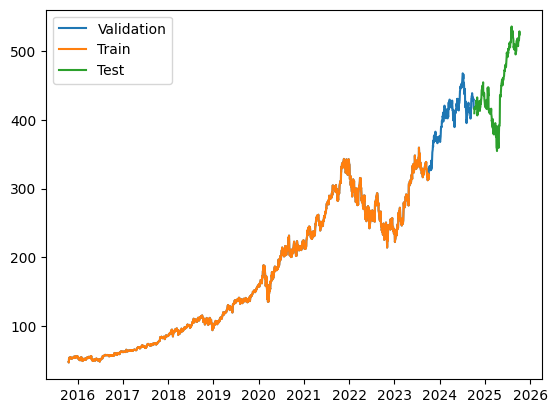

In [58]:
plt.plot(X_val.index, y_val)
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.legend(['Validation', 'Train', 'Test'])
plt.show()

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 37246.7617 - mean_absolute_error: 169.1190 - val_loss: 47905.8633 - val_mean_absolute_error: 185.1519
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 28683.1582 - mean_absolute_error: 140.2990 - val_loss: 18348.1035 - val_mean_absolute_error: 106.0477
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8777.1953 - mean_absolute_error: 79.9832 - val_loss: 6018.8799 - val_mean_absolute_error: 45.0197
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1039.5254 - mean_absolute_error: 16.4615 - val_loss: 1361.9615 - val_mean_absolute_error: 16.2343
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 78.1863 - mean_absolute_error: 5.3052 - val_loss: 921.5893 - val_mean_absolute_error: 13.8794
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 47.0091 - mean_absolute_error: 4.6377 - val_loss: 747.5194 - val_mean_absolute_error: 11.7032
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


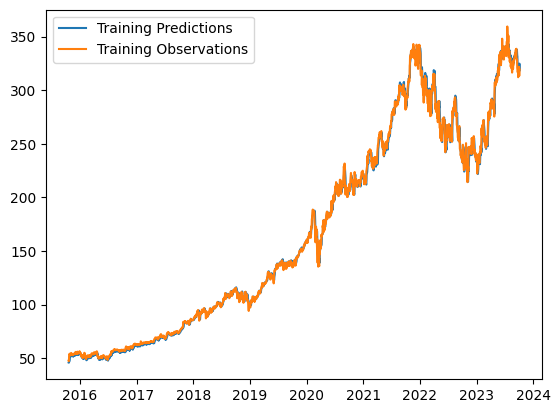

In [60]:
train_predictions = model.predict(X_train).flatten()

plt.plot(X_train.index, train_predictions)
plt.plot(X_train.index, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


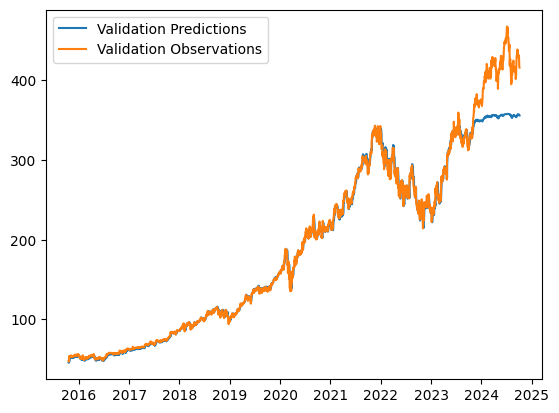

In [61]:
val_predictions = model.predict(X_val).flatten()

plt.plot(X_val.index, val_predictions)
plt.plot(X_val.index, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


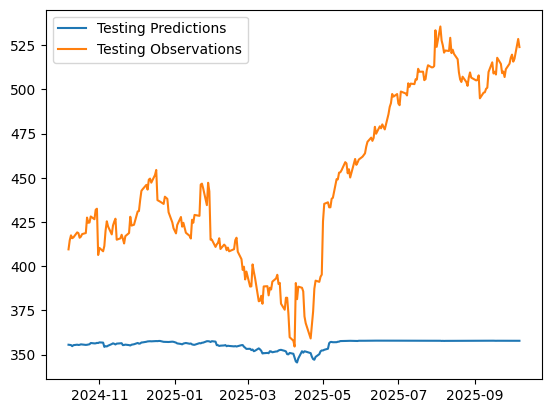

In [62]:
test_predictions = model.predict(X_test).flatten()

plt.plot(X_test.index, test_predictions)
plt.plot(X_test.index, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [63]:
# hence the model is not performing well on if we take 3 lag values
# lets try it with 7 lag values

In [64]:
df4 = df2.copy()
# sorting df4
df4.sort_index(inplace=True)
df4.head()

,Close/Last,Target-1,Target-2,Target-3,Target-4,Target-5,Target-6,Target-7
Date,,,,,,,,
2015-10-20,47.77,47.62,47.51,47.01,46.68,46.89,47.00,47.11
2015-10-21,47.20,47.77,47.62,47.51,47.01,46.68,46.89,47.00
2015-10-22,48.03,47.20,47.77,47.62,47.51,47.01,46.68,46.89
2015-10-23,52.87,48.03,47.20,47.77,47.62,47.51,47.01,46.68
2015-10-26,54.25,52.87,48.03,47.20,47.77,47.62,47.51,47.01


In [65]:
l1_80 = len(df4) * 0.8
l1_90 = len(df4) * 0.9

print(l1_80, l1_90)

2004.8000000000002 2255.4


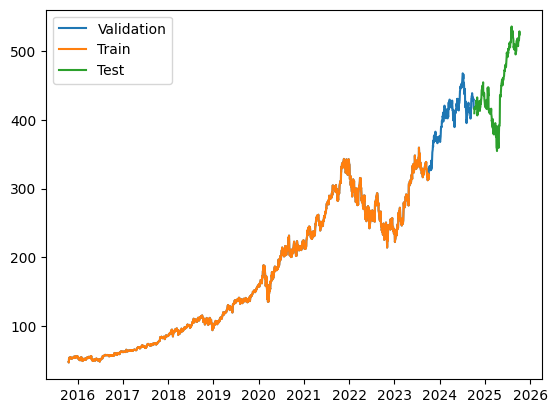

In [66]:
X1 = df4.drop(['Close/Last'], axis=1)
y1 = df4['Close/Last']
X1_train , y1_train = X1[:int(l_80)], y1[:int(l_80)]
X1_val, y1_val = X1[:int(l_90)], y1[:int(l_90)]
X1_test, y1_test = X1[int(l_90):], y1[int(l_90):]
plt.plot(X1_val.index, y1_val)
plt.plot(X1_train.index, y1_train)
plt.plot(X1_test.index, y1_test)
plt.legend(['Validation', 'Train', 'Test'])
plt.show()

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model1 = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model1.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 36976.4258 - mean_absolute_error: 167.2223 - val_loss: 44307.6523 - val_mean_absolute_error: 174.4138
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 24049.2480 - mean_absolute_error: 123.8588 - val_loss: 14154.3975 - val_mean_absolute_error: 100.6927
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7374.4189 - mean_absolute_error: 75.1211 - val_loss: 3693.3032 - val_mean_absolute_error: 33.8290
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 473.8361 - mean_absolute_error: 11.8818 - val_loss: 1135.1823 - val_mean_absolute_error: 15.4299
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 74.7456 - mean_absolute_error: 5.6036 - val_loss: 851.3606 - val_mean_absolute_error: 13.3927
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 75.7731 - mean_absolute_error: 5.8014 - val_loss: 745.8069 - val_mean_absolute_error: 12.9316
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


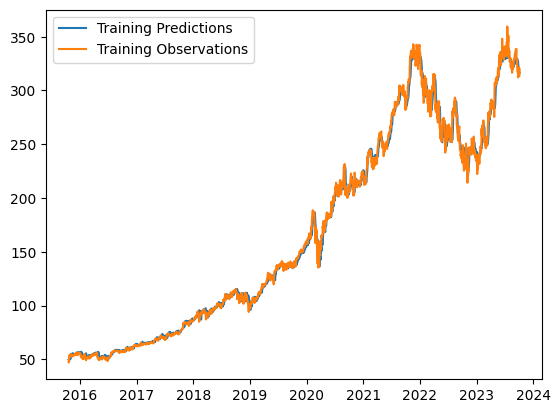

In [68]:
train1_predictions = model1.predict(X1_train).flatten()

plt.plot(X1_train.index, train1_predictions)
plt.plot(X1_train.index, y1_train)
plt.legend(['Training Predictions', 'Training Observations'])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


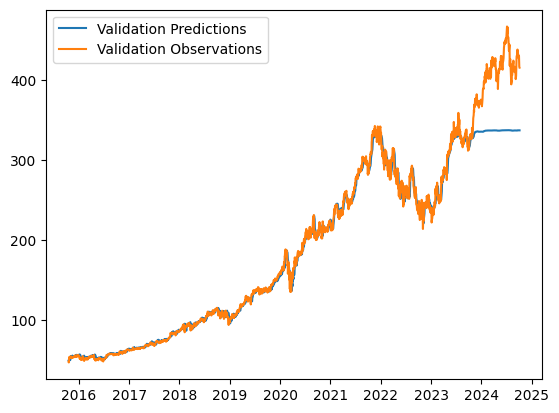

In [69]:
val1_predictions = model1.predict(X1_val).flatten()

plt.plot(X1_val.index, val1_predictions)
plt.plot(X1_val.index, y1_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


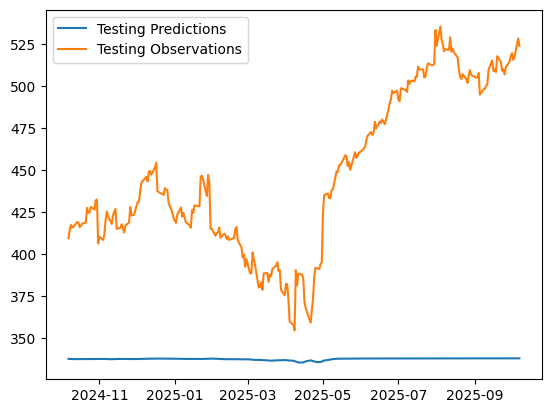

In [70]:
test1_predictions = model1.predict(X1_test).flatten()

plt.plot(X1_test.index, test1_predictions)
plt.plot(X1_test.index, y1_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [71]:
# this model is not able to predict
# trying transfer learning on this dataset
# refer notebook transfer-better-accuracy